In [1]:
import rasterio
import os
import fiona
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import pandas as pd

In [2]:
bg = gpd.read_file(r"C:\Users\User\Documents\UNITN\Geospatial\raster\Bulgaria_regions_NUTS_3\Bulgaria_regions_NUTS_3.shp")
bg = bg.to_crs(4326)

In [3]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [4]:
districtsnames = bg.NAME_LATN.tolist()

In [5]:
all_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
images_districts_permonths = {}

for m in all_months:
    file_name_prec = f"C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\precipitation\\wc2.1_5m_prec\\wc2.1_5m_prec_{m}.tif"
    month_prec = rasterio.open(file_name_prec)
    month_data = month_prec.read(1)
    month_data[month_data == -32768] = -1

    
    images_districts_permonths[m] = []

    for district in districtsnames:
        geom = bg[bg.NAME_LATN == district].geometry
        coords = getFeatures(geom)

        out_img, out_transform = mask(month_prec, coords, crop=True)
        out_meta = month_prec.meta
        out_img[out_img == -32768] = -1

        average_m = out_img[out_img != -1].mean()

        images_districts_permonths[m].append((district, out_img, out_transform))
    




In [19]:
file_name_prec

'C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\precipitation\\wc2.1_5m_prec\\wc2.1_5m_prec_12.tif'

In [20]:
#images_districts_permonths

{'01': [('Sofia',
   array([[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
            -1, -1, -1, -1, -1, -1],
           [-1, -1, -1, -1, 40, -1, -1, -1, 36, 36, -1, -1, -1, -1, -1, -1,
            -1, -1, -1, -1, -1, -1],
           [-1, -1, -1, 36, 37, 38, 38, 38, 35, 35, -1, 34, -1, 34, 35, -1,
            36, -1, -1, -1, -1, -1],
           [-1, 35, 35, 35, 35, 35, 35, 35, 34, 36, 38, 35, 34, 35, 35, 35,
            35, -1, -1, -1, -1, -1],
           [-1, 35, 34, 34, 34, 34, 34, -1, 34, 35, 35, 36, 35, 34, 36, 35,
            36, 37, -1, -1, -1, -1],
           [-1, -1, -1, 34, 33, 33, 33, -1, -1, -1, -1, -1, 37, 36, 38, 37,
            37, 39, -1, -1, -1, -1],
           [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 34, 35, 36, 37, 37,
            38, 37, 38, 39, -1, -1],
           [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 34, 34, 35, 36, 36, 36,
            36, 37, 38, 39, 39, -1],
           [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 35, 35, 37, 37, -1,
  

In [6]:
cityname_imgs_all = {}

for m in images_districts_permonths.keys():
    monthvalues = images_districts_permonths[m]

    for city in monthvalues:
        cityname = city[0]
        if cityname not in cityname_imgs_all.keys():
            cityname_imgs_all[cityname] = []
        numpyimg = city[1]
        transf = city[2]
        cityname_imgs_all[cityname].append((numpyimg, transf))

In [67]:
cityname_imgs_all["Sofia"]

[(array([[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
           -1, -1, -1, -1, -1, -1],
          [-1, -1, -1, -1, 40, -1, -1, -1, 36, 36, -1, -1, -1, -1, -1, -1,
           -1, -1, -1, -1, -1, -1],
          [-1, -1, -1, 36, 37, 38, 38, 38, 35, 35, -1, 34, -1, 34, 35, -1,
           36, -1, -1, -1, -1, -1],
          [-1, 35, 35, 35, 35, 35, 35, 35, 34, 36, 38, 35, 34, 35, 35, 35,
           35, -1, -1, -1, -1, -1],
          [-1, 35, 34, 34, 34, 34, 34, -1, 34, 35, 35, 36, 35, 34, 36, 35,
           36, 37, -1, -1, -1, -1],
          [-1, -1, -1, 34, 33, 33, 33, -1, -1, -1, -1, -1, 37, 36, 38, 37,
           37, 39, -1, -1, -1, -1],
          [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 34, 35, 36, 37, 37,
           38, 37, 38, 39, -1, -1],
          [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 34, 34, 35, 36, 36, 36,
           36, 37, 38, 39, 39, -1],
          [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 35, 35, 37, 37, -1,
           -1, -1, -1, -1, -1, -1],
 

## Creating a dataframe of points with geographical coordinates which exhibit the highest values of precipitation

In [11]:
points_maxprec = []

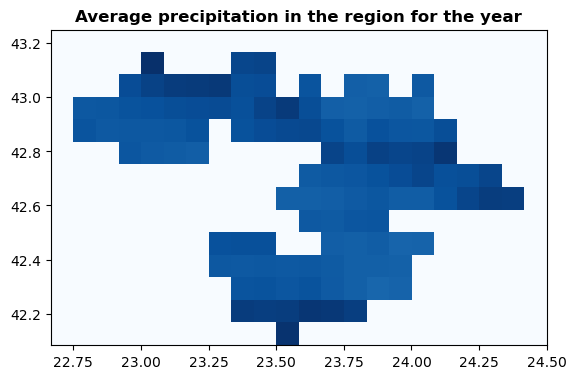

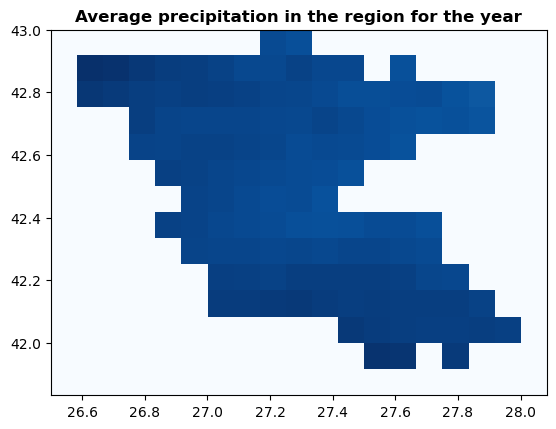

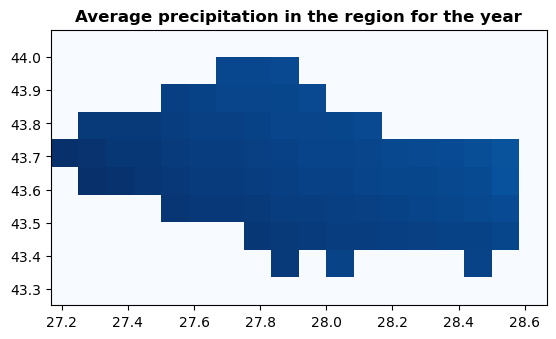

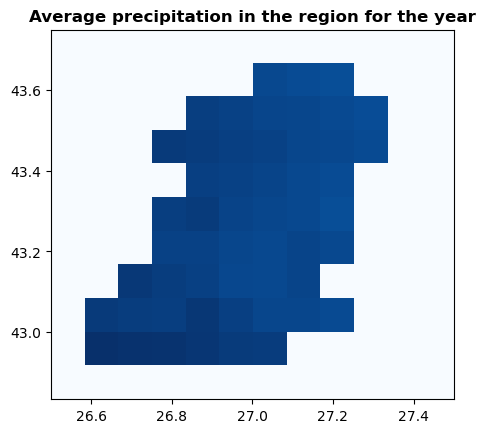

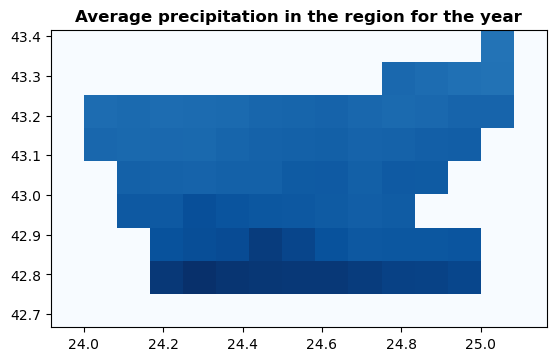

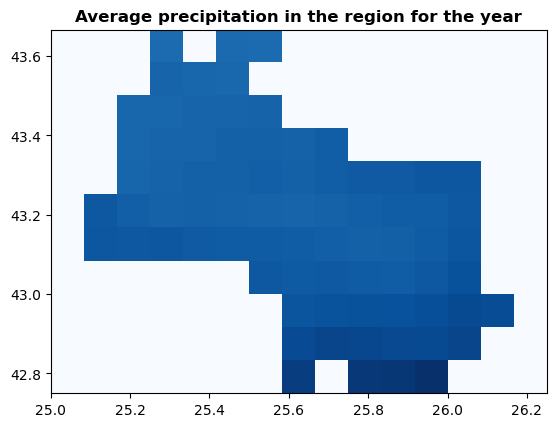

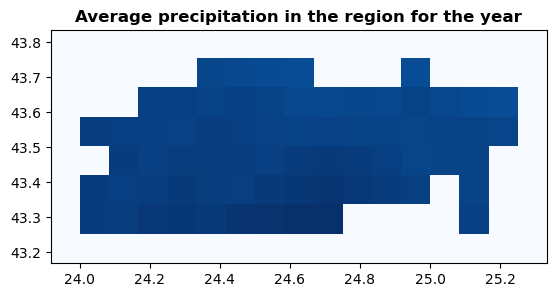

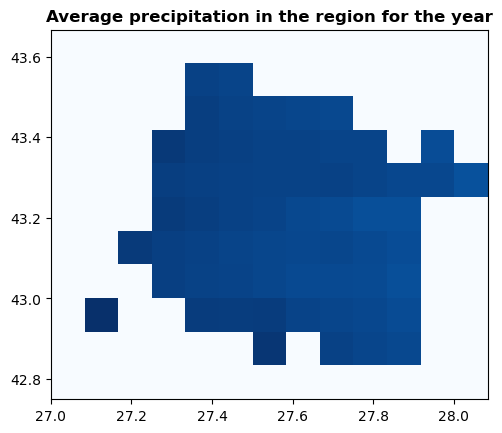

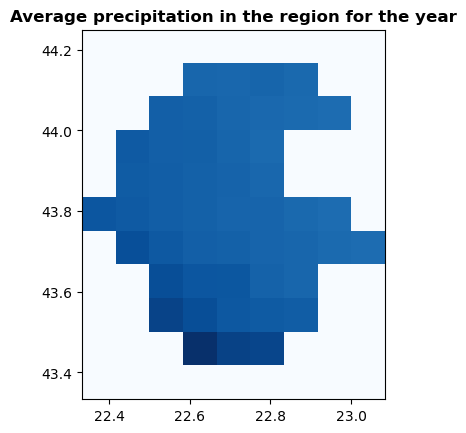

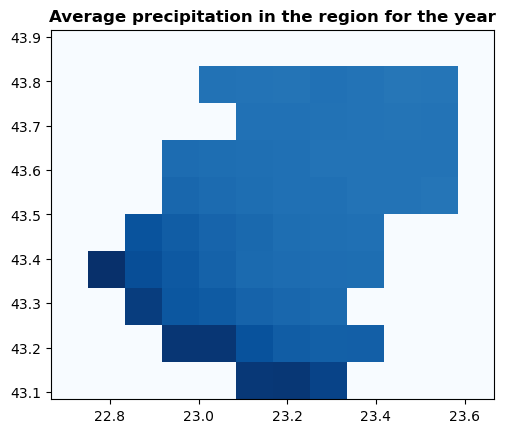

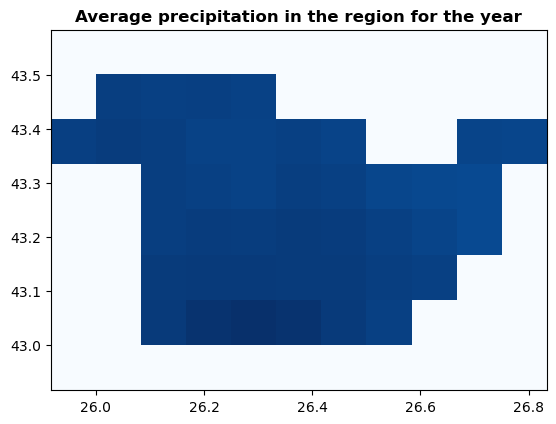

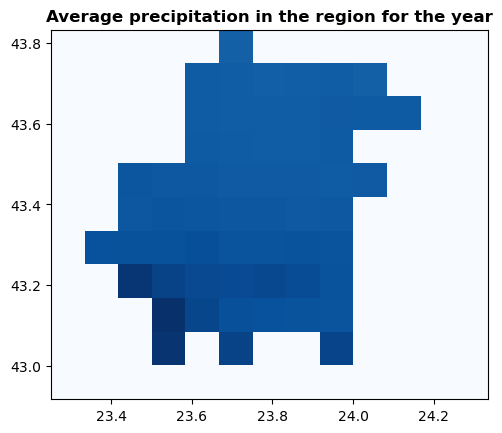

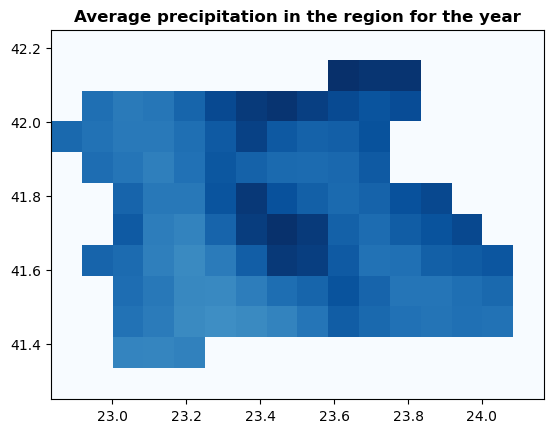

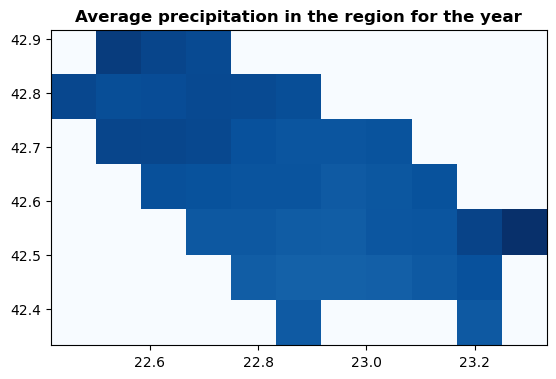

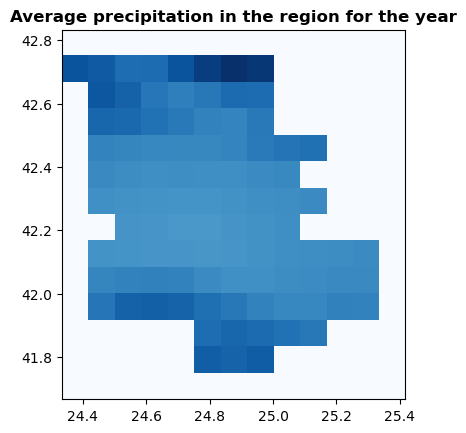

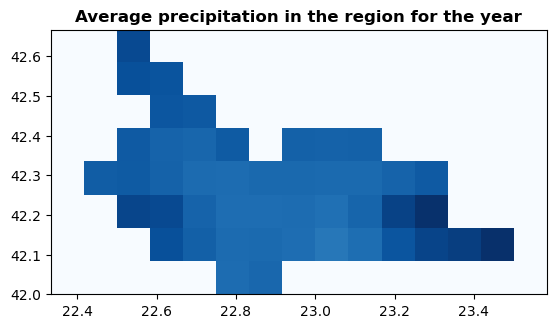

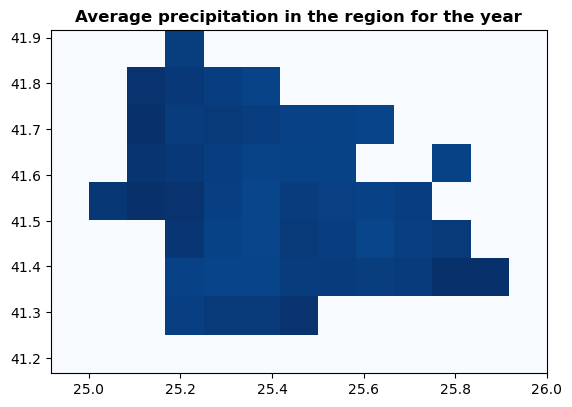

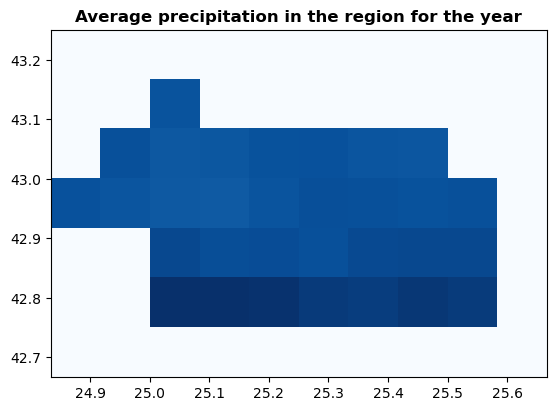

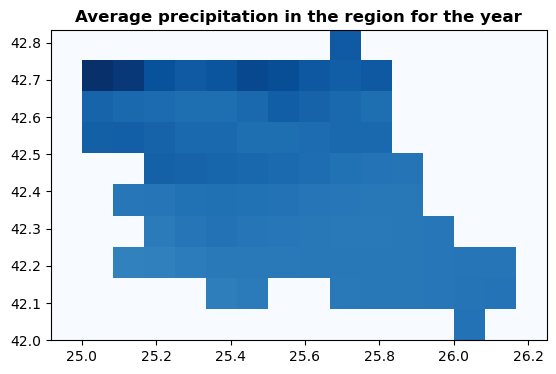

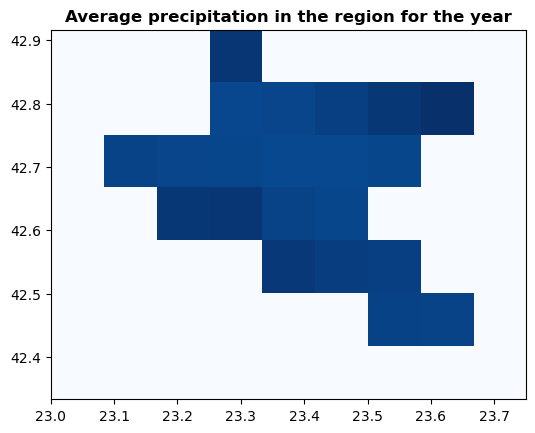

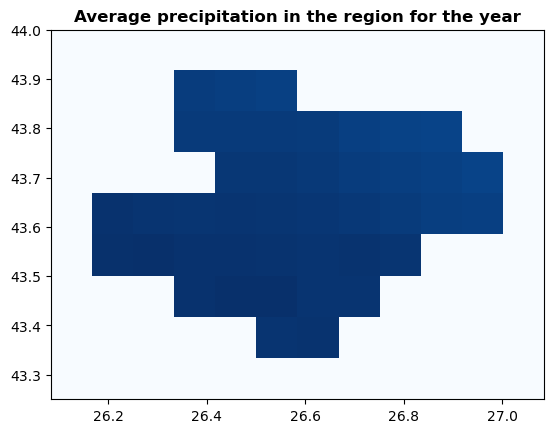

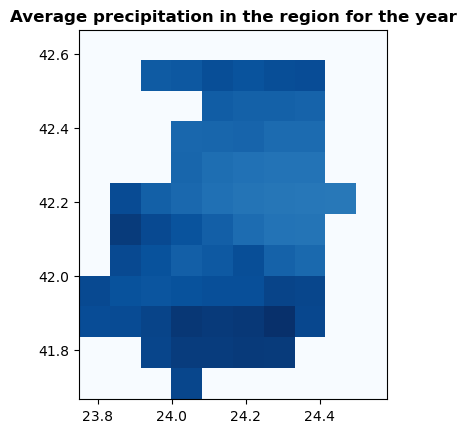

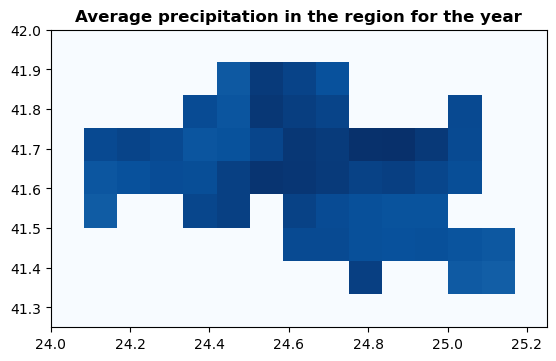

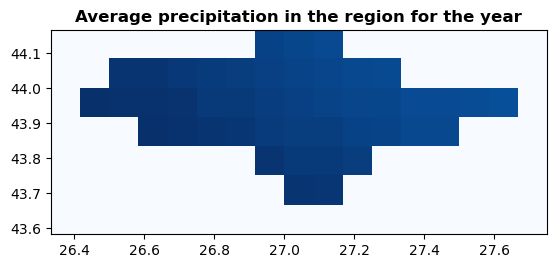

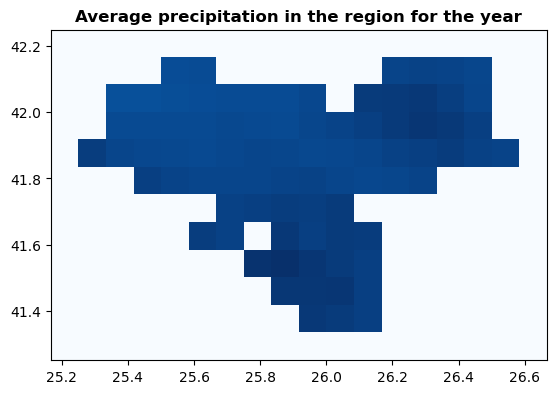

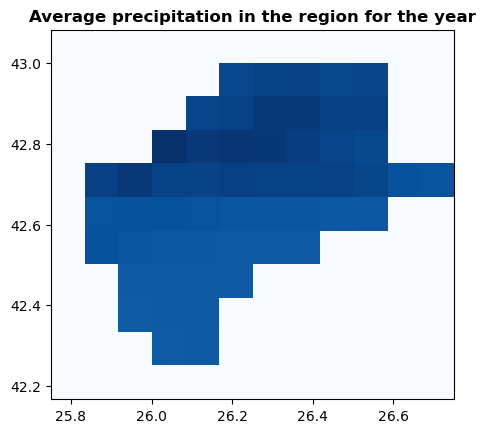

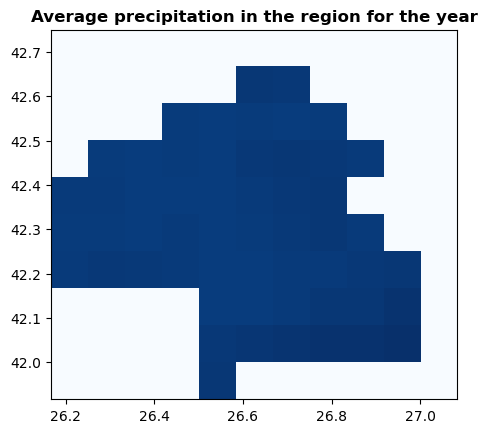

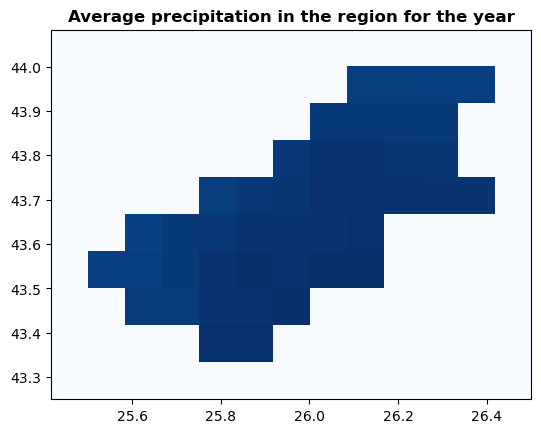

In [26]:
for city in cityname_imgs_all.keys():
    sumarray = np.zeros(cityname_imgs_all[city][0][0].shape)
    info = cityname_imgs_all[city]
    for i in range(0,12): #go through months
        numpyarr = info[i][0]
        transf = info[i][1]
        sumarray = sumarray +  numpyarr
    avgarray = sumarray/12
    show(avgarray, transform = transf, cmap = "Blues", title = 'Average precipitation in the region for the year')

    meta = month_prec.meta

    meta.update(
        compress='lzw',
        transform = transf,
        height = avgarray.shape[1],
            width = avgarray.shape[2])
    #save as a raster with the proper specifications
    with rasterio.open(f'C:\\Users\\User\\Documents\\UNITN\\Geospatial\\For_GITHUB_project\\Plovdiv_Infographics\\Data\\Climate\\averages_tiff_climatevariables\\precip\\avgprec{city}.tiff', 'w', **meta) as dst:
            dst.write(avgarray.astype(rasterio.uint16))

    #open this newly saved raster
    rast = rasterio.open(f"C:\\Users\\User\\Documents\\UNITN\\Geospatial\\For_GITHUB_project\\Plovdiv_Infographics\\Data\\Climate\\averages_tiff_climatevariables\\precip\\avgprec{city}.tiff")
    rastdata = rast.read(1)

    # get point of where the maximum average value for this city is
    indices = np.where(rastdata == rastdata.max()) 
    #print(f"Indices: {indices}")

    point = rast.xy(indices[0][0], indices[1][0])
    df = pd.DataFrame({"Latitude": point[1], "Longitude": point[0]}, index = [0])
    point = gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs = month_prec.crs)
    points_maxprec.append(point) #all the points

    rast.close()




In [27]:
maxpoints = pd.concat(points_maxprec).reset_index().drop('index', axis = 1)


In [31]:
type(maxpoints)

geopandas.geodataframe.GeoDataFrame

Plot the regions with where the maximum precipitation has been

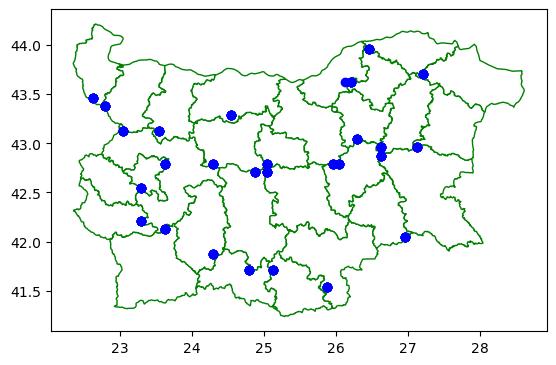

In [75]:
ax = bg.to_crs(4326).plot(color = "white", edgecolor = "green")
maxpoints.plot(ax = ax, color = "blue")

Most precipitation appears to be in the mountains

## Temperature

In [69]:
all_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
images_districts_permonths = {}

for m in all_months:
    file_name_temp = f"C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\precipitation\\wc2.1_2.5m_tavg\\wc2.1_2.5m_tavg_{m}.tif"
    month_temp = rasterio.open(file_name_temp)
    month_data = month_temp.read(1)
    month_data[month_data == -3.39999995e+38] = -100

    
    images_districts_permonths[m] = []

    for district in districtsnames:
        geom = bg[bg.NAME_LATN == district].geometry
        coords = getFeatures(geom)

        out_img, out_transform = mask(month_temp, coords, crop=True)
        out_meta = month_temp.meta
        out_img[out_img == -3.39999995e+38] = -100
        out_img = out_img.astype(float)
        out_img[out_img == -100] = np.nan

        average_m = out_img[out_img != -100].mean()

        images_districts_permonths[m].append((district, out_img, out_transform))

    month_temp.close()

In [80]:
cityname_imgs_all = {}

for m in images_districts_permonths.keys():
    monthvalues = images_districts_permonths[m]

    for city in monthvalues:
        cityname = city[0]
        if cityname not in cityname_imgs_all.keys():
            cityname_imgs_all[cityname] = []
        numpyimg = city[1]
        transf = city[2]
        cityname_imgs_all[cityname].append((numpyimg, transf))

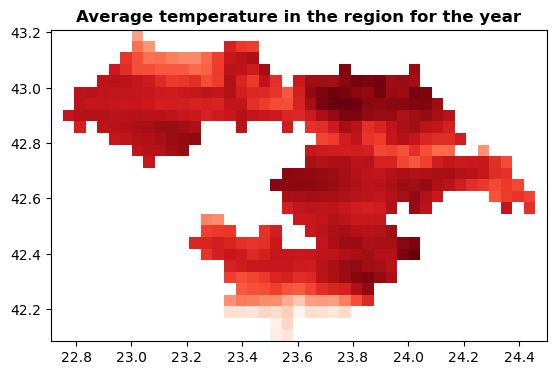

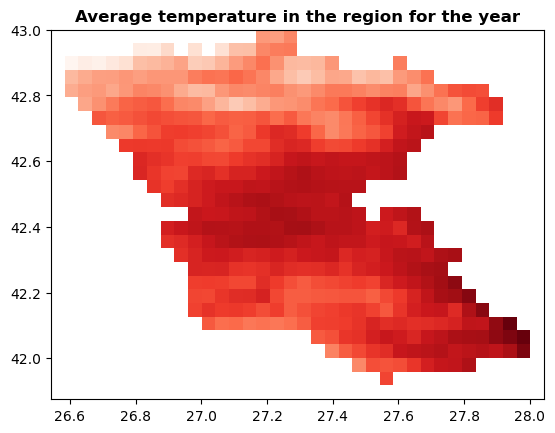

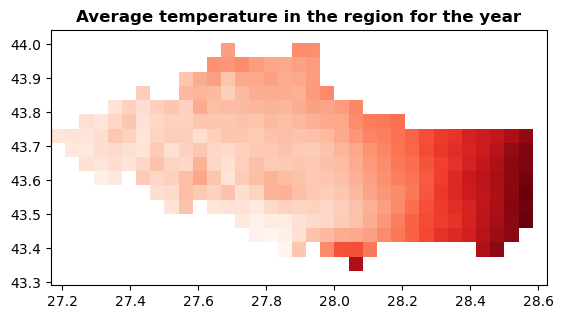

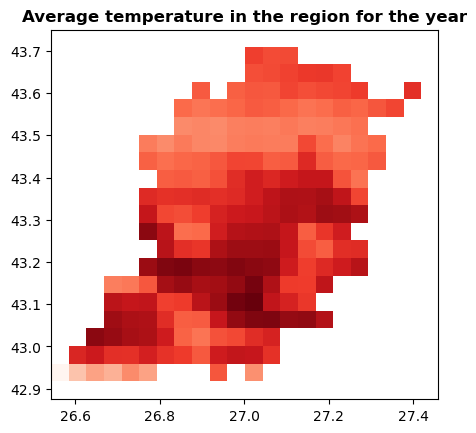

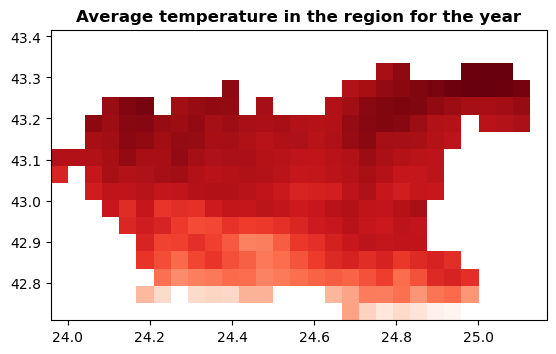

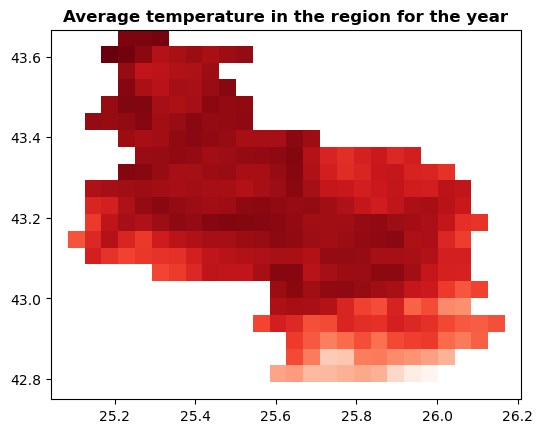

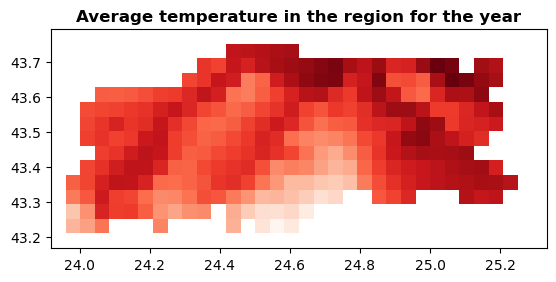

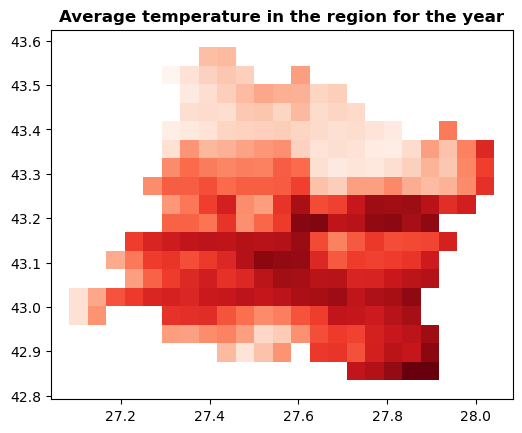

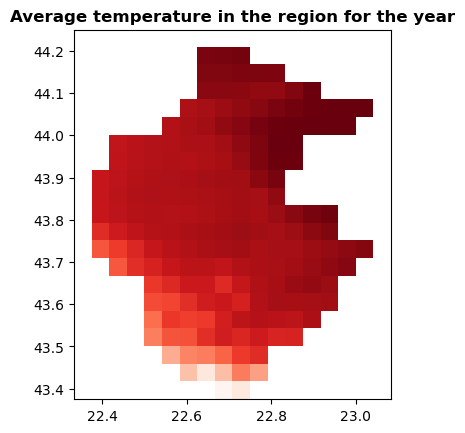

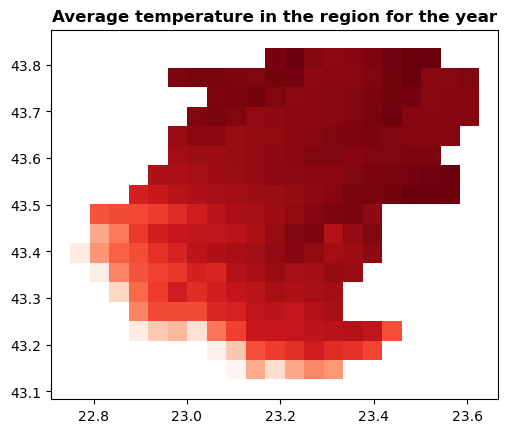

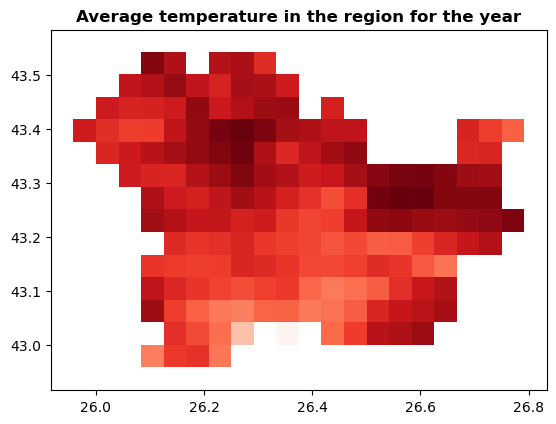

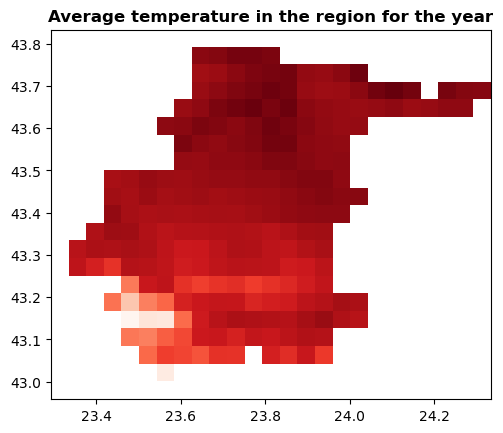

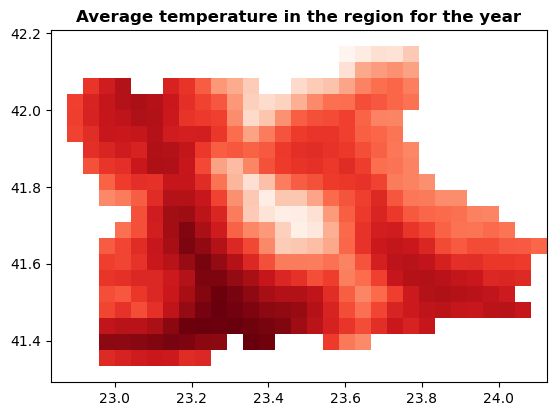

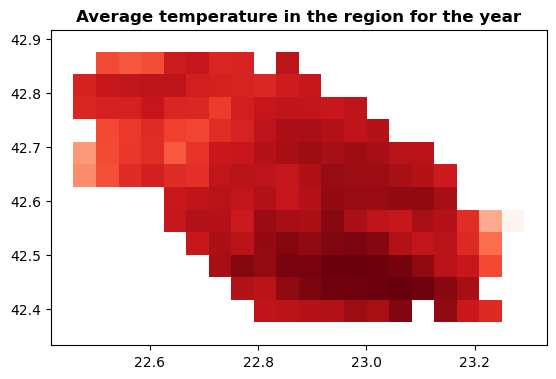

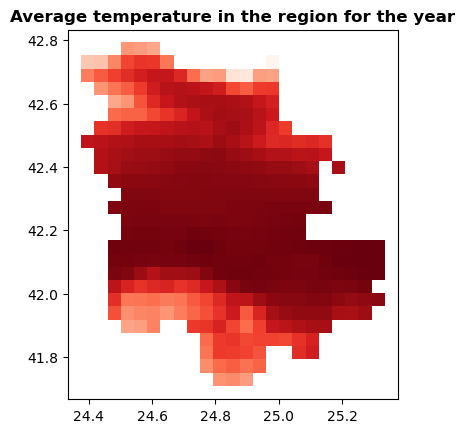

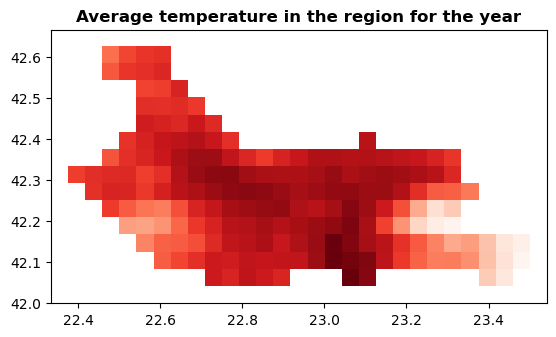

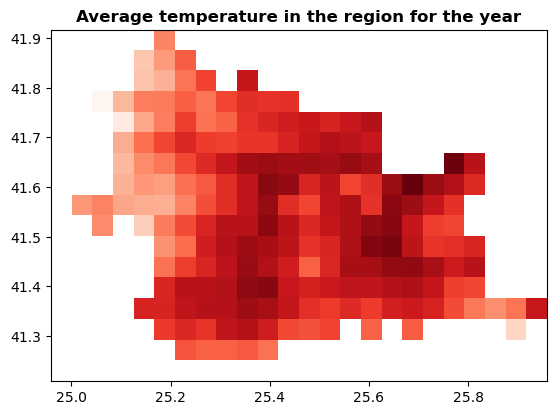

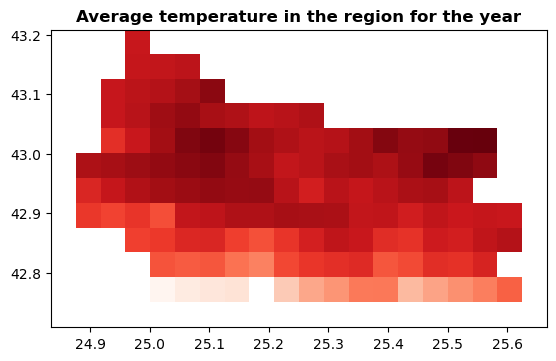

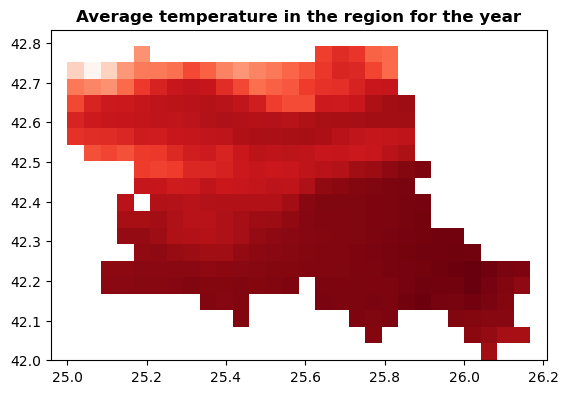

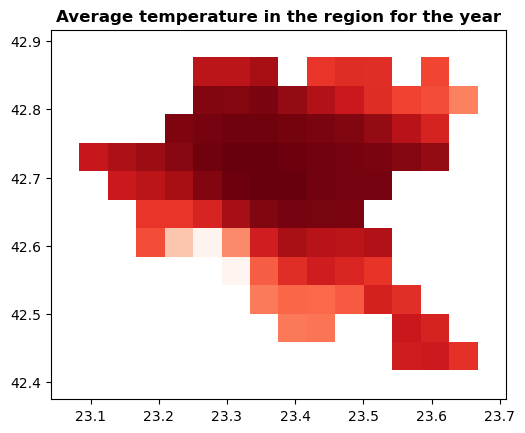

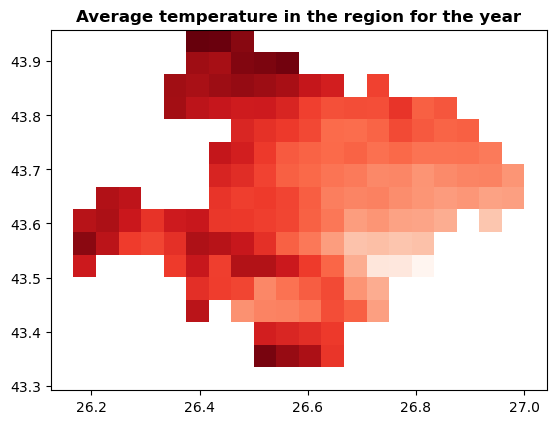

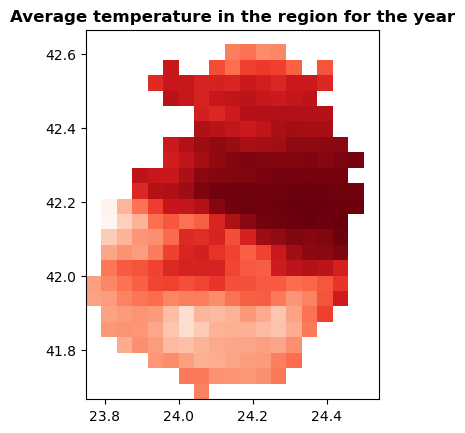

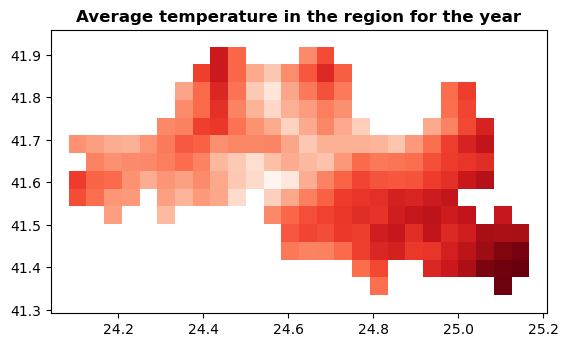

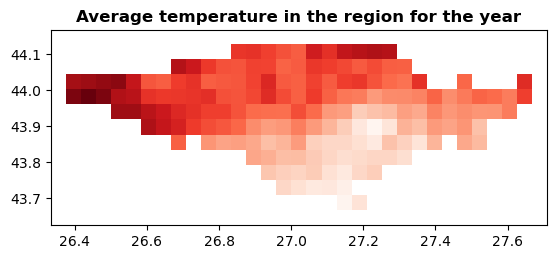

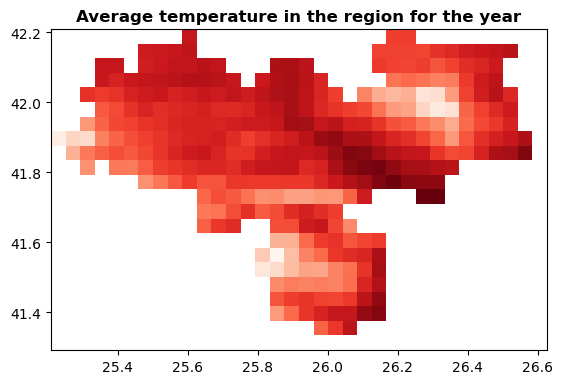

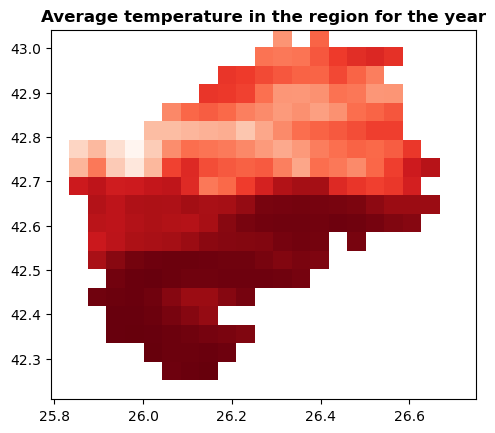

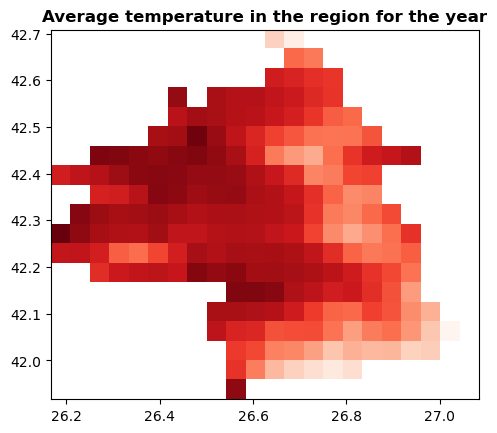

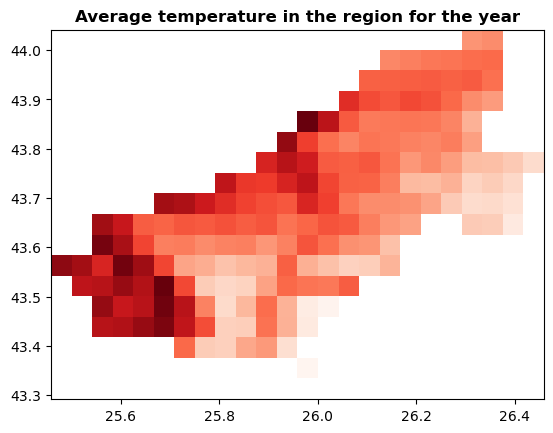

In [81]:
points_maxtemp = []

for city in cityname_imgs_all.keys():
    sumarray = np.zeros(cityname_imgs_all[city][0][0].shape)
    info = cityname_imgs_all[city]
    for i in range(0,12): #go through months
        numpyarr = info[i][0]
        transf = info[i][1]
        sumarray = sumarray +  numpyarr
    avgarray = sumarray/12
    show(avgarray, transform = transf, cmap = "Reds", title = 'Average temperature in the region for the year')

    meta = month_prec.meta

    meta.update(
        compress='lzw',
        transform = transf,
        height = avgarray.shape[1],
            width = avgarray.shape[2])
    #save as a raster with the proper specifications
    with rasterio.open(f'C:\\Users\\User\\Documents\\UNITN\\Geospatial\\For_GITHUB_project\\Plovdiv_Infographics\\Data\\Climate\\averages_tiff_climatevariables\\temper\\avgtemp{city}.tiff', 'w', **meta) as dst:
            dst.write(avgarray.astype(rasterio.uint16))

    #open this newly saved raster
    rast = rasterio.open(f"C:\\Users\\User\\Documents\\UNITN\\Geospatial\\For_GITHUB_project\\Plovdiv_Infographics\\Data\\Climate\\averages_tiff_climatevariables\\temper\\avgtemp{city}.tiff")
    rastdata = rast.read(1)

    # get point of where the maximum average value for this city is
    indices = np.where(rastdata == rastdata.max()) 
    #print(f"Indices: {indices}")

    point = rast.xy(indices[0][0], indices[1][0])
    df = pd.DataFrame({"Latitude": point[1], "Longitude": point[0]}, index = [0])
    point = gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs = month_prec.crs)
    points_maxtemp.append(point) #all the points

    rast.close()



In [82]:
maxpointstemp = pd.concat(points_maxtemp).reset_index().drop('index', axis = 1)

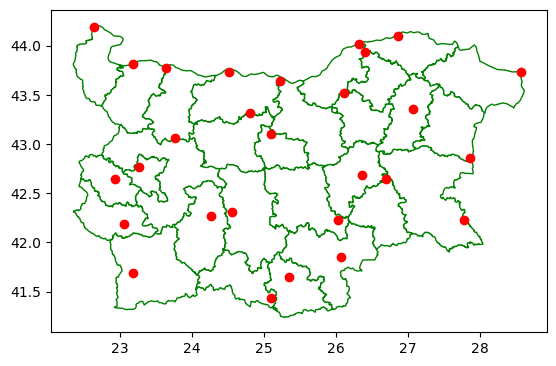

In [83]:
ax = bg.to_crs(4326).plot(color = "white", edgecolor = "green")
maxpointstemp.plot(ax = ax, color = "red")

## Wind Speed

In [85]:
all_months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
images_districts_permonths = {}

for m in all_months:
    file_name_wind = f"C:\\Users\\User\\Documents\\UNITN\\Geospatial\\raster\\precipitation\\wc2.1_5m_wind\\wc2.1_5m_wind_{m}.tif"
    month_wind = rasterio.open(file_name_wind)
    month_data = month_wind.read(1)
    month_data = month_data.astype(float)
    month_data[month_data == -3.3999999521443642e+38] = np.nan

    
    images_districts_permonths[m] = []

    for district in districtsnames:
        geom = bg[bg.NAME_LATN == district].geometry
        coords = getFeatures(geom)

        out_img, out_transform = mask(month_wind, coords, crop=True)
        out_meta = month_wind.meta
        out_img[out_img == -3.3999999521443642e+38] = -100
        out_img = out_img.astype(float)
        out_img[out_img == -100] = np.nan

        average_m = out_img[out_img != -100].mean()

        images_districts_permonths[m].append((district, out_img, out_transform))

    month_wind.close()

In [86]:

cityname_imgs_all = {}

for m in images_districts_permonths.keys():
    monthvalues = images_districts_permonths[m]

    for city in monthvalues:
        cityname = city[0]
        if cityname not in cityname_imgs_all.keys():
            cityname_imgs_all[cityname] = []
        numpyimg = city[1]
        transf = city[2]
        cityname_imgs_all[cityname].append((numpyimg, transf))

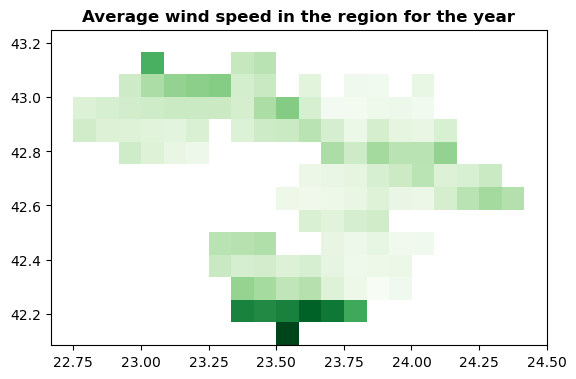

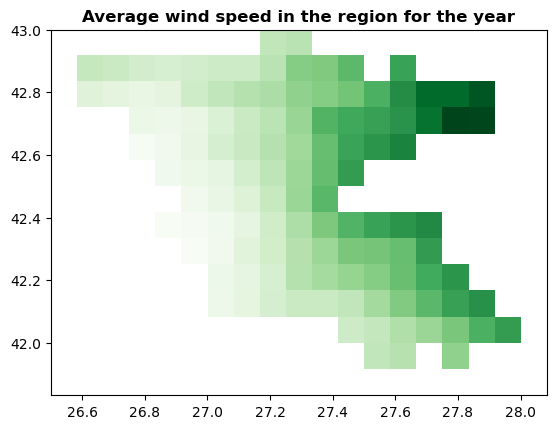

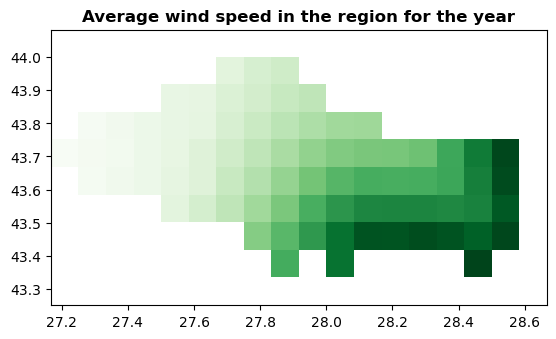

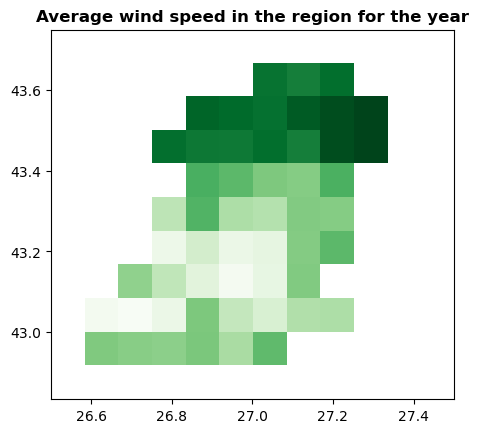

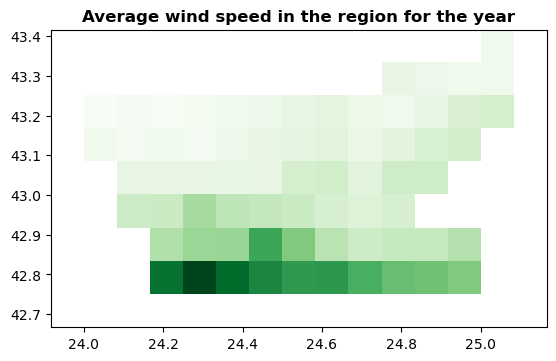

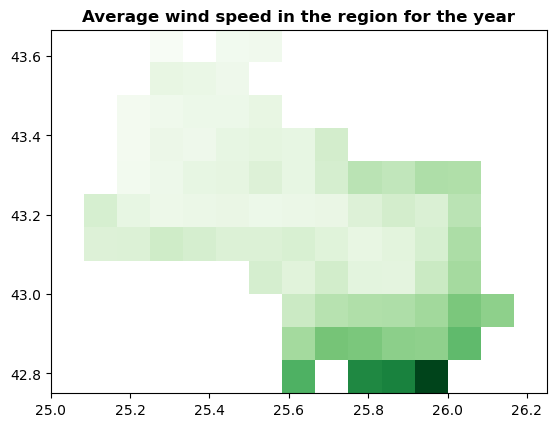

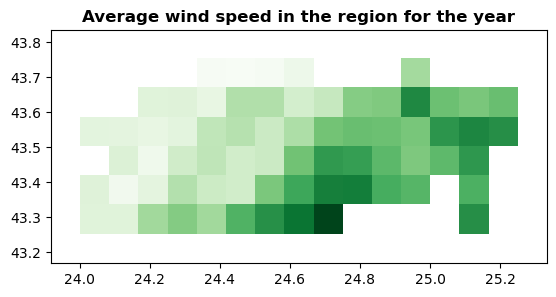

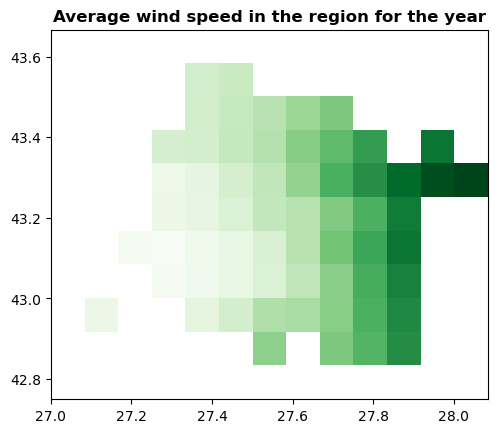

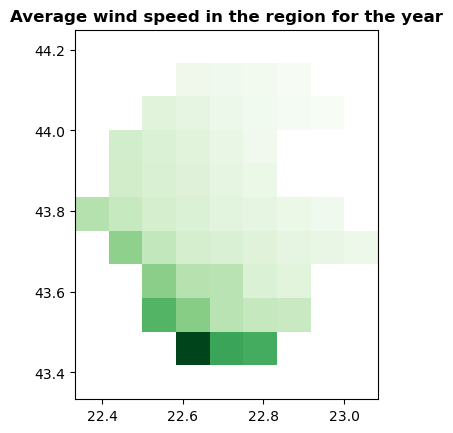

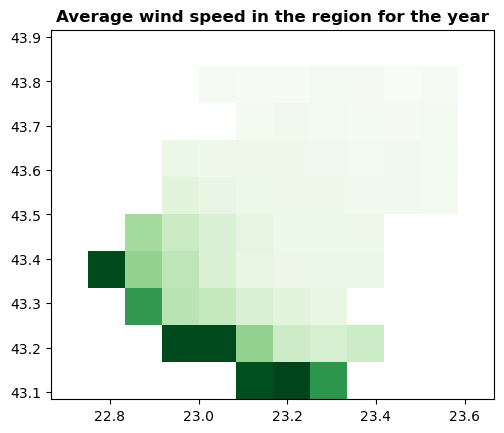

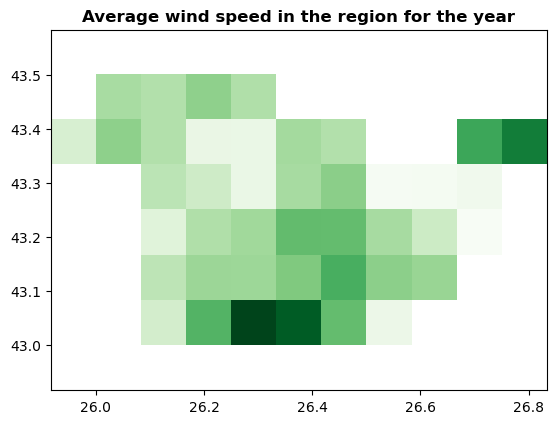

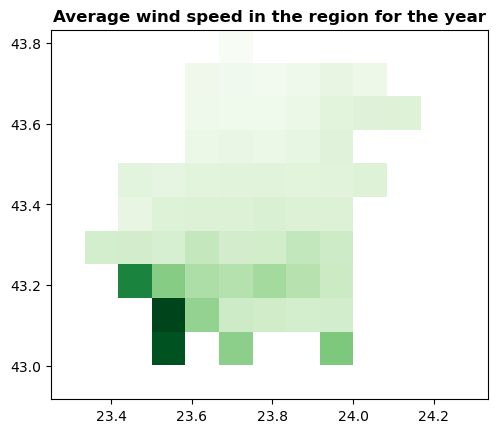

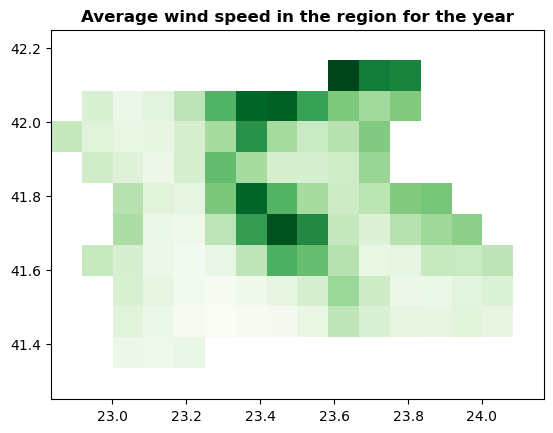

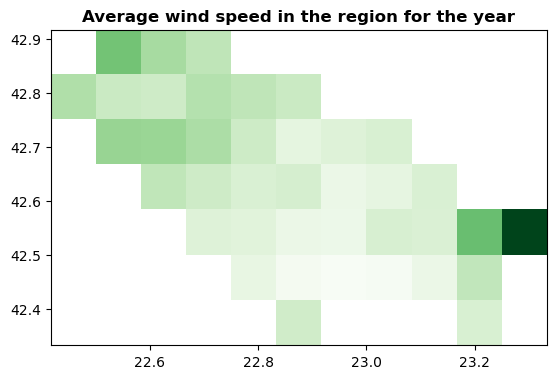

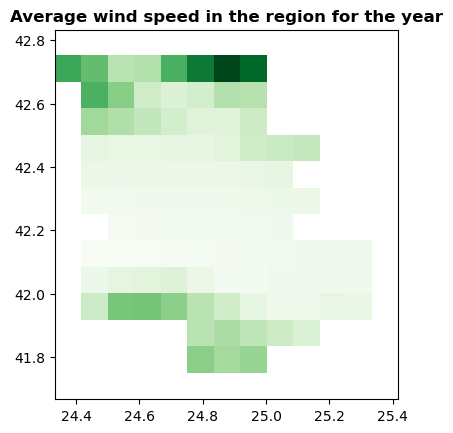

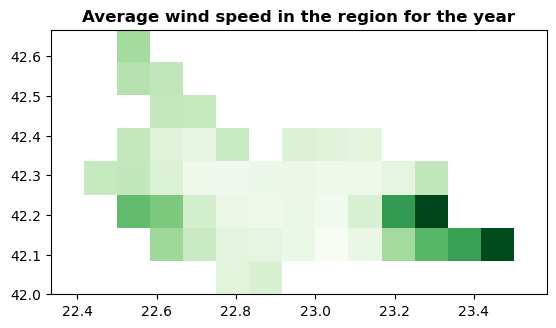

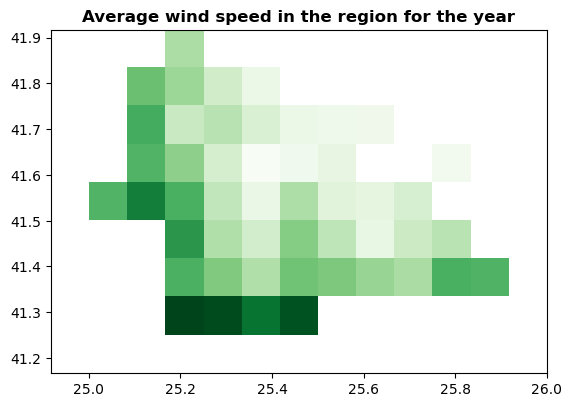

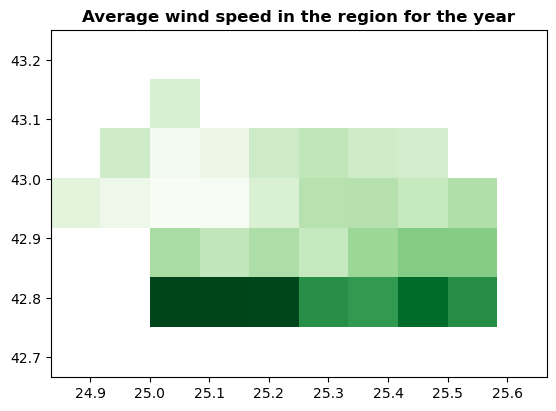

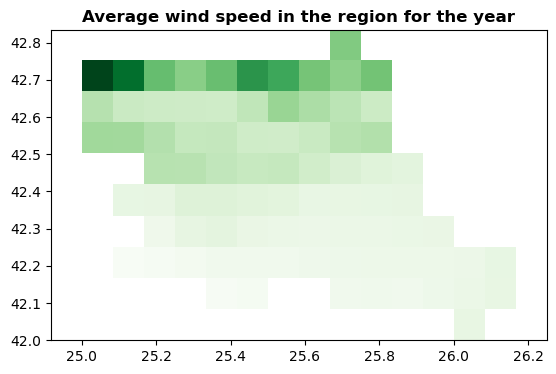

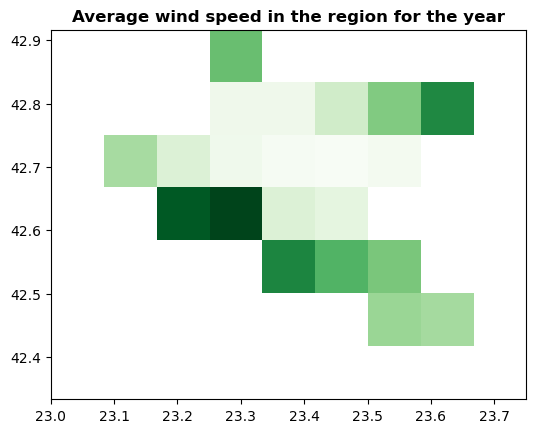

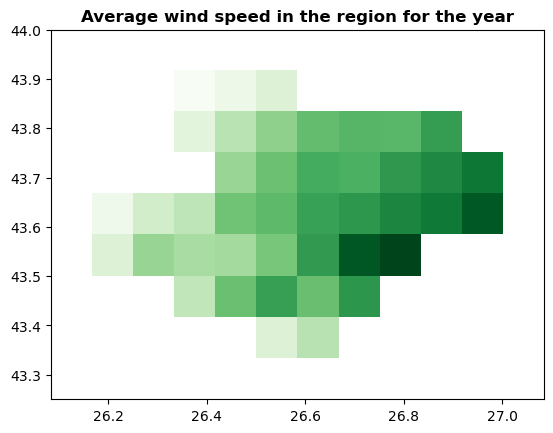

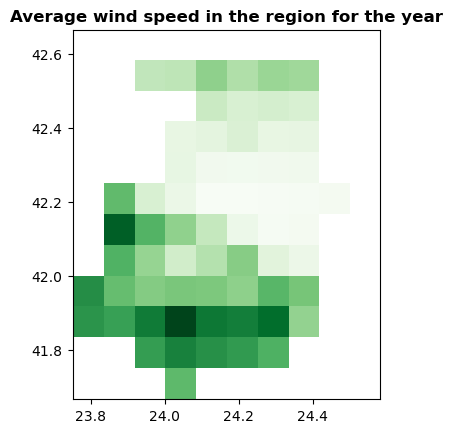

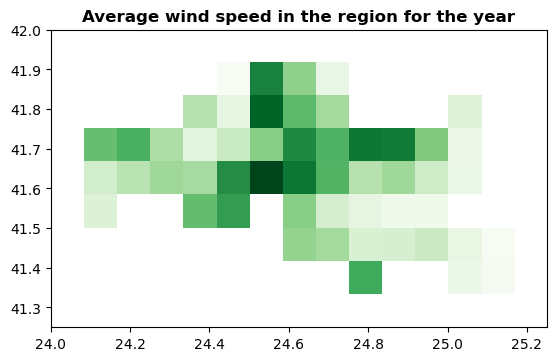

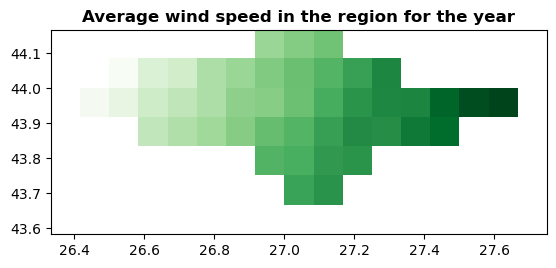

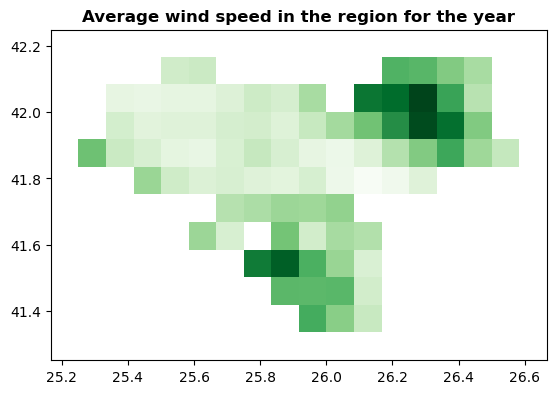

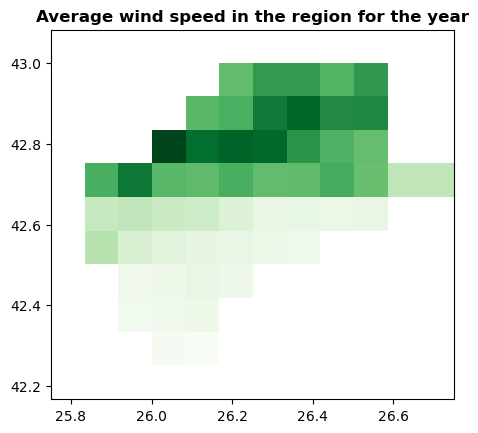

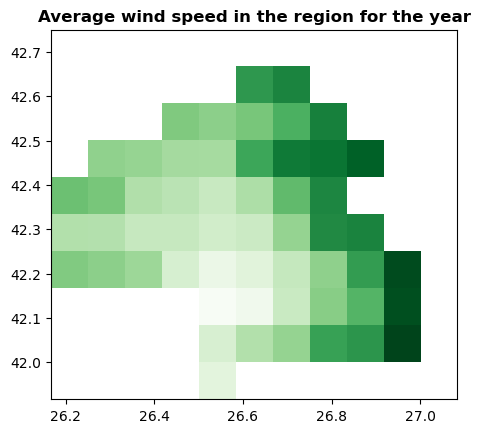

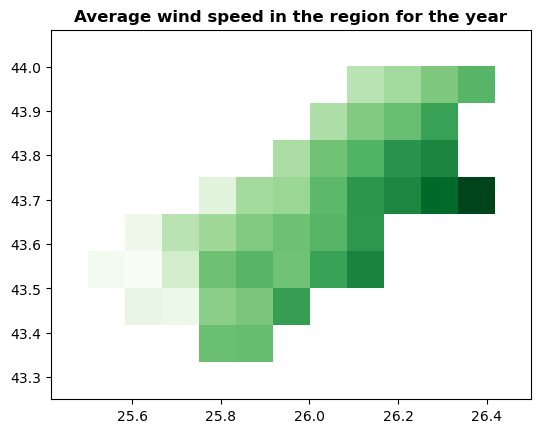

In [89]:

points_maxwind = []

for city in cityname_imgs_all.keys():
    sumarray = np.zeros(cityname_imgs_all[city][0][0].shape)
    info = cityname_imgs_all[city]
    for i in range(0,12): #go through months
        numpyarr = info[i][0]
        transf = info[i][1]
        sumarray = sumarray +  numpyarr
    avgarray = sumarray/12
    show(avgarray, transform = transf, cmap = "Greens", title = 'Average wind speed in the region for the year')

    meta = month_prec.meta

    meta.update(
        compress='lzw',
        transform = transf,
        height = avgarray.shape[1],
            width = avgarray.shape[2])
    #save as a raster with the proper specifications
    with rasterio.open(f'C:\\Users\\User\\Documents\\UNITN\\Geospatial\\For_GITHUB_project\\Plovdiv_Infographics\\Data\\Climate\\averages_tiff_climatevariables\\wind\\avgwind{city}.tiff', 'w', **meta) as dst:
            dst.write(avgarray.astype(rasterio.uint16))

    #open this newly saved raster
    rast = rasterio.open(f"C:\\Users\\User\\Documents\\UNITN\\Geospatial\\For_GITHUB_project\\Plovdiv_Infographics\\Data\\Climate\\averages_tiff_climatevariables\\wind\\avgwind{city}.tiff")
    rastdata = rast.read(1)

    # get point of where the maximum average value for this city is
    indices = np.where(rastdata == rastdata.max()) 
    #print(f"Indices: {indices}")

    point = rast.xy(indices[0][0], indices[1][0])
    df = pd.DataFrame({"Latitude": point[1], "Longitude": point[0]}, index = [0])
    point = gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs = month_prec.crs)
    points_maxwind.append(point) #all the points

    rast.close()



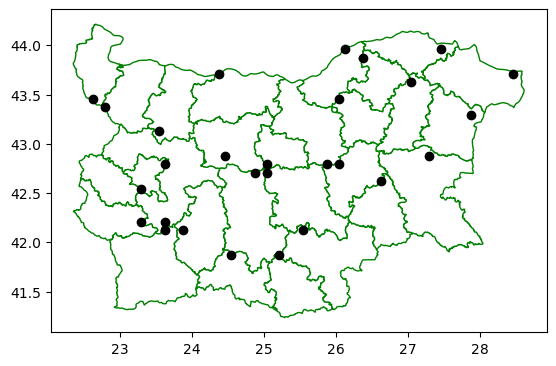

In [91]:
maxpointswind = pd.concat(points_maxwind).reset_index().drop('index', axis = 1)
ax = bg.to_crs(4326).plot(color = "white", edgecolor = "green")
maxpointswind.plot(ax = ax, color = "black")

# Appendix


In [21]:
cityname_imgs = []

for m in images_districts_permonths.keys():
    monthvalues = images_districts_permonths[m]
    for city in monthvalues:
        if city[0] == "Sofia":
            numpyimg = city[1]
            transf = city[2]
            cityname_imgs.append((numpyimg, transf))

In [46]:
sumarray = np.zeros(cityname_imgs[0][0].shape)
for m in cityname_imgs:
    sumarray = sumarray +  m[0]


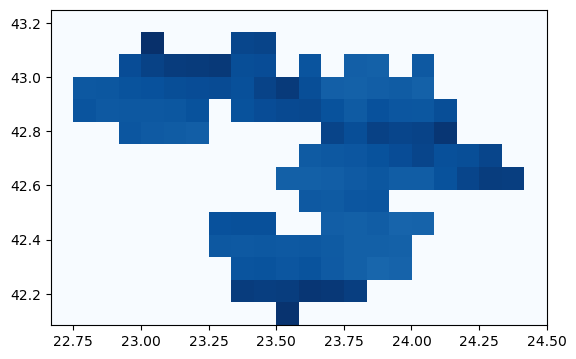

In [49]:
avgarray = sumarray/12
show(avgarray, transform = m[1], cmap = "Blues")

Indices: (array([1], dtype=int64), array([4], dtype=int64))


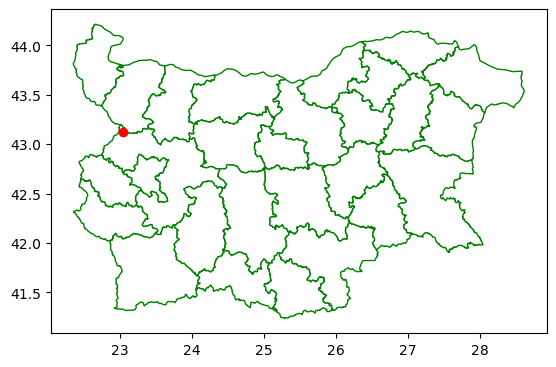

In [51]:
meta = month_prec.meta

meta.update(
       #dtype=rasterio.uint8,
       compress='lzw',
       transform = m[1],
       height = avgarray.shape[1],
        width = avgarray.shape[2])

with rasterio.open(r'C:\Users\User\Documents\UNITN\Geospatial\raster\acaso2.tiff', 'w', **meta) as dst:
        dst.write(avgarray.astype(rasterio.uint16))

acaso2 = rasterio.open(r"C:\Users\User\Documents\UNITN\Geospatial\raster\acaso2.tiff")
acaso2data = acaso2.read(1)

indices = np.where(acaso2data == acaso2data.max())
print(f"Indices: {indices}")

point = acaso2.xy(indices[0][0], indices[1][0])
df = pd.DataFrame({"Latitude": point[1], "Longitude": point[0]}, index = [0])
point = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs = month_prec.crs)

ax = bg.to_crs(4326).plot(color = "white", edgecolor = "green")
point.plot(ax = ax, color = "red")